# TASK_7
##  Develop a Neural Network that can Read Handwriting
### Done by :- Vatsavai Vinay Varma

## Importing required libraries

In [14]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

## Load the MNIST dataset

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Preprocess the data

In [4]:
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

## Define the model architecture

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

## Compile the model

In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Train the model

In [7]:
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 22s 51ms/step - loss: 0.2538 - accuracy: 0.9255 - val_loss: 0.0736 - val_accuracy: 0.9787
Epoch 2/10
422/422 [==============================] - 26s 61ms/step - loss: 0.0712 - accuracy: 0.9778 - val_loss: 0.0564 - val_accuracy: 0.9832
Epoch 3/10
422/422 [==============================] - 25s 59ms/step - loss: 0.0487 - accuracy: 0.9852 - val_loss: 0.0467 - val_accuracy: 0.9893
Epoch 4/10
422/422 [==============================] - 27s 63ms/step - loss: 0.0373 - accuracy: 0.9887 - val_loss: 0.0393 - val_accuracy: 0.9893
Epoch 5/10
422/422 [==============================] - 26s 61ms/step - loss: 0.0306 - accuracy: 0.9906 - val_loss: 0.0373 - val_accuracy: 0.9895
Epoch 6/10
422/422 [==============================] - 25s 59ms/step - loss: 0.0247 - accuracy: 0.9920 - val_loss: 0.0363 - val_accuracy: 0.9910
Epoch 7/10
422/422 [==============================] - 26s 62ms/step - loss: 0.0204 - accuracy: 0.9934 - val_loss: 0.0363 - val_accuracy:

## Get user-defined index

In [16]:
user_index = int(input("Enter the index of the image you want to predict: "))

Enter the index of the image you want to predict: 5


## Predict value at user-defined index

In [17]:
prediction = model.predict(x_test[user_index].reshape(1, 28, 28, 1))
predicted_label = tf.argmax(prediction, axis=1).numpy()[0]

## Print the predicted label and show the image

Predicted label: 1


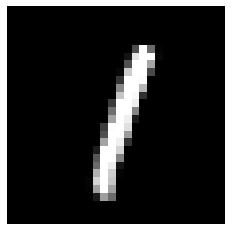

In [18]:
print(f"Predicted label: {predicted_label}")
plt.imshow(x_test[user_index].reshape(28, 28), cmap='gray')
plt.axis('off')
plt.show()